# Insurance Claim Fraud Detection

C SOMA SEKHAR GOUD

BATCH.NO: DS2307



In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [110]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
df = pd.read_csv(url)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [111]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [112]:
# Count '?' in each column
question_mark_counts = {col: df[col].eq('?').sum() for col in df.columns}

# Display columns with at least one '?'
found_question_mark_columns = {col: count for col, count in question_mark_counts.items() if count > 0}

# Print the columns and counts
for col, count in found_question_mark_columns.items():
    print(f"{col}: {count} '?' found")

collision_type: 178 '?' found
property_damage: 360 '?' found
police_report_available: 343 '?' found


In [113]:
# Columns to replace '?' with NaN
columns_replace = ['collision_type', 'property_damage', 'police_report_available']

# Replace '?' with NaN in specified columns
df[columns_replace] = df[columns_replace].replace('?', np.nan)

# Verify the changes
for col in columns_replace:
    count_nan = df[col].isnull().sum()
    print(f"{col}: {count_nan} NaN values after replacement")


collision_type: 178 NaN values after replacement
property_damage: 360 NaN values after replacement
police_report_available: 343 NaN values after replacement


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [115]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [116]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [117]:
# Replacing the null values
# Columns to replace NaN values with mode
to_replace = ['collision_type', 'property_damage', 'police_report_available']

# Replace NaN values with mode in specified columns
for col in to_replace:
    mode_value = df[col].mode()[0]  # Calculate the mode
    df[col].fillna(mode_value, inplace=True)

# Checking
for col in to_replace:
    count_null = df[col].isnull().sum()
    print(f"{col}: {count_null} NaN values after replacing with mode")

collision_type: 0 NaN values after replacing with mode
property_damage: 0 NaN values after replacing with mode
police_report_available: 0 NaN values after replacing with mode


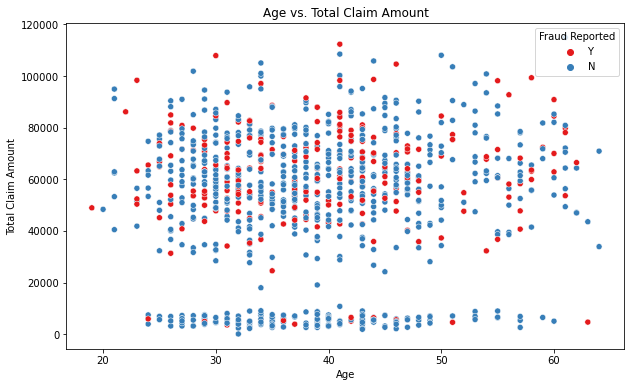

In [118]:
# Plot Age vs. Total Claim Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_claim_amount', data=df, hue='fraud_reported', palette='Set1')
plt.title('Age vs. Total Claim Amount')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

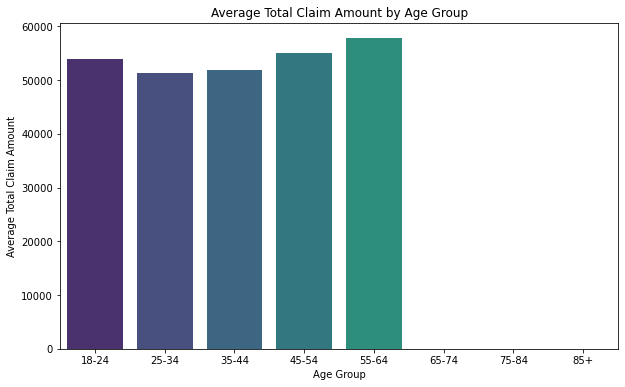

In [119]:
# Create a copy of the DataFrame
df2 = df.copy()

# Create age groups (you can adjust the bins as needed)
bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']
df2['age_group'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)

# Calculate the average total claim amount for each age group
average_claim_by_age = df2.groupby('age_group')['total_claim_amount'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_claim_amount', data=average_claim_by_age, palette='viridis')
plt.title('Average Total Claim Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Claim Amount')
plt.show()

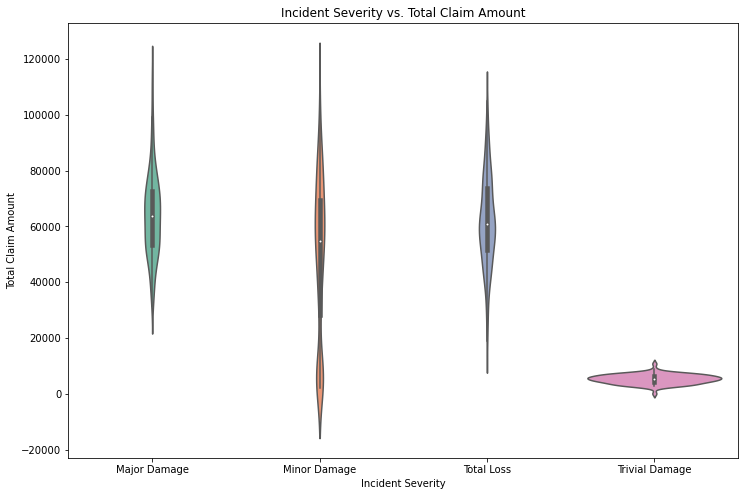

In [120]:
# violin plot to visualize how the severity of the incident relates to the total claim amount.
# Plot a boxplot or violin plot for Incident Severity vs. Total Claim Amount
plt.figure(figsize=(12, 8))
sns.violinplot(x='incident_severity', y='total_claim_amount', data=df, palette='Set2')
plt.title('Incident Severity vs. Total Claim Amount')
plt.xlabel('Incident Severity')
plt.ylabel('Total Claim Amount')
plt.show()

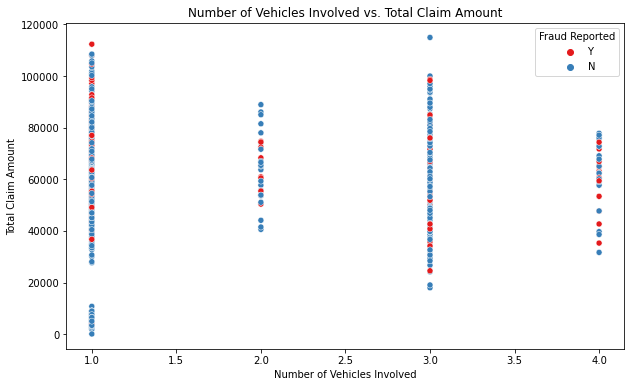

In [121]:
# Plot a scatter plot for Number of Vehicles Involved vs. Total Claim Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_of_vehicles_involved', y='total_claim_amount', data=df, hue='fraud_reported', palette='Set1')
plt.title('Number of Vehicles Involved vs. Total Claim Amount')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Total Claim Amount')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

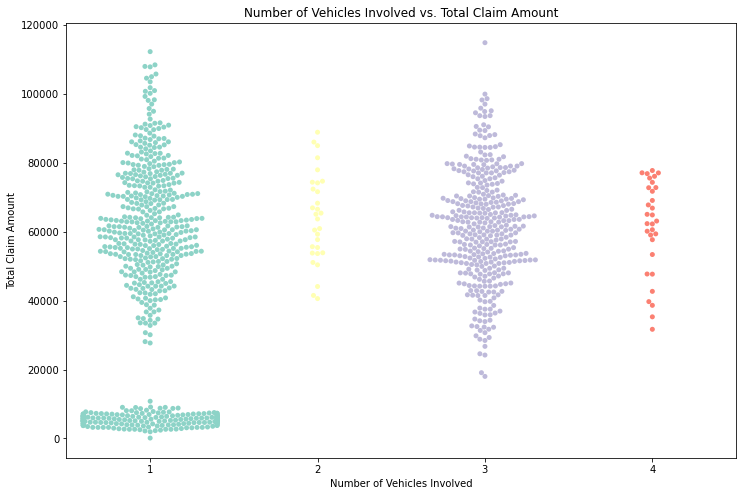

In [122]:

# Plot a categorical scatter plot for Number of Vehicles Involved vs. Total Claim Amount
plt.figure(figsize=(12, 8))
sns.swarmplot(x='number_of_vehicles_involved', y='total_claim_amount', data=df, palette='Set3')
plt.title('Number of Vehicles Involved vs. Total Claim Amount')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Total Claim Amount')
plt.show()

In [123]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

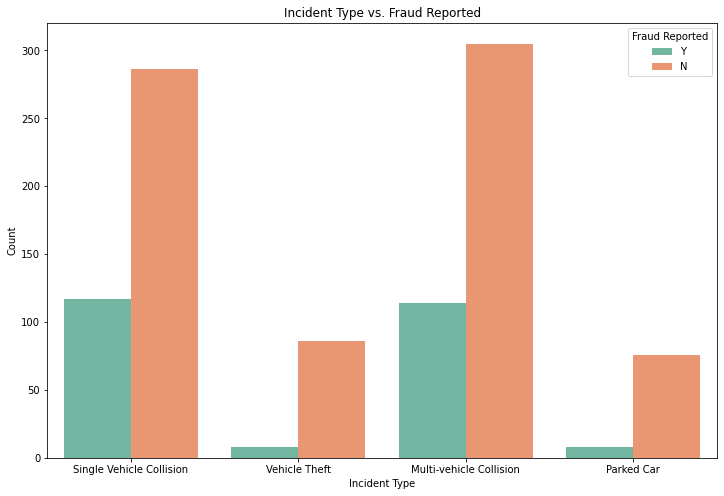

In [124]:
# Plot Stacked bar chart: Incident Type vs. Fraud Reported
plt.figure(figsize=(12, 8))
sns.countplot(x='incident_type', hue='fraud_reported', data=df, palette='Set2')
plt.title('Incident Type vs. Fraud Reported')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

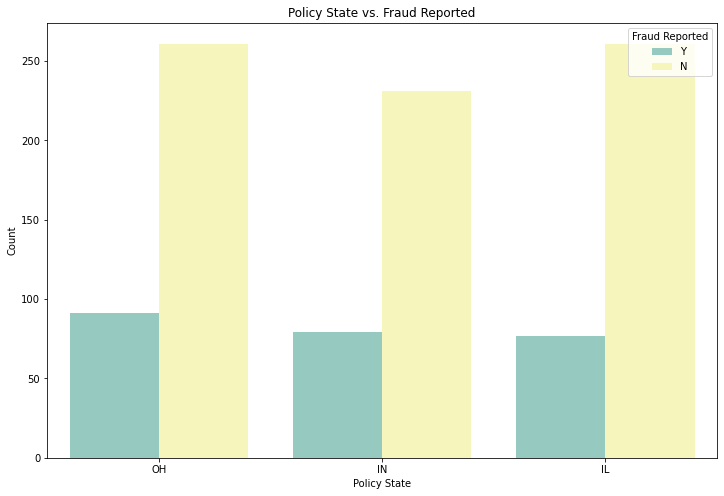

In [125]:
# Plot Stacked bar chart: Policy State vs. Fraud Reported
plt.figure(figsize=(12, 8))
sns.countplot(x='policy_state', hue='fraud_reported', data=df, palette='Set3')
plt.title('Policy State vs. Fraud Reported')
plt.xlabel('Policy State')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

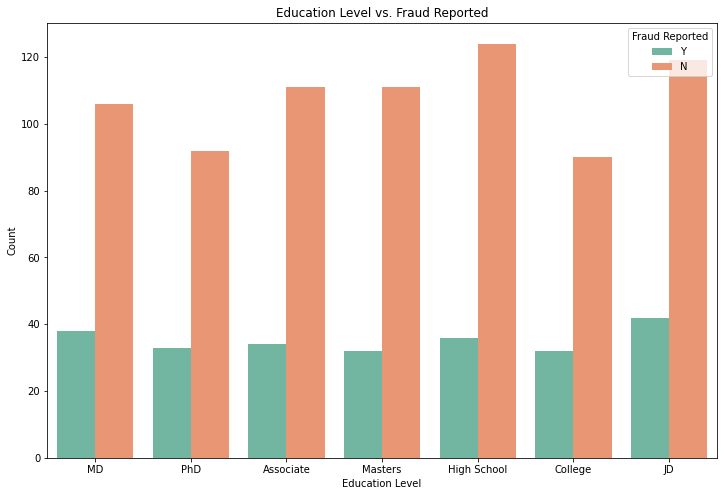

In [126]:
# Plot Stacked bar chart: Education Level vs. Fraud Reported
plt.figure(figsize=(12, 8))
sns.countplot(x='insured_education_level', hue='fraud_reported', data=df, palette='Set2')
plt.title('Education Level vs. Fraud Reported')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

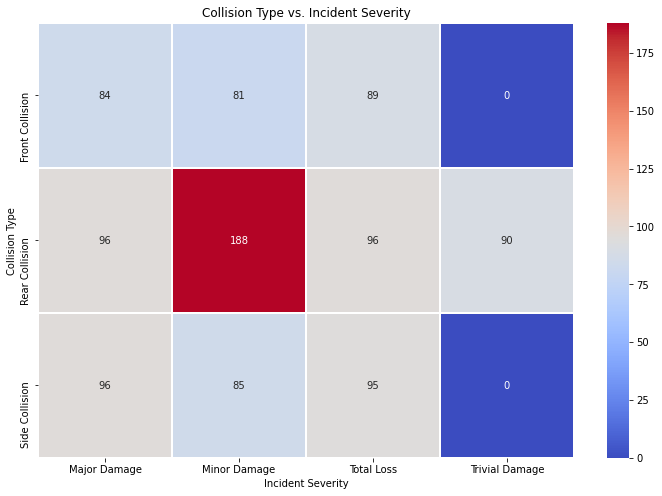

In [127]:
# Plot Heatmap: Collision Type vs. Incident Severity
plt.figure(figsize=(12, 8))
collision_severity_matrix = df.groupby(['collision_type', 'incident_severity']).size().unstack().fillna(0)
sns.heatmap(collision_severity_matrix, annot=True, cmap='coolwarm', fmt=".0f", linewidths=0.5)
plt.title('Collision Type vs. Incident Severity')
plt.xlabel('Incident Severity')
plt.ylabel('Collision Type')
plt.show()

* This suggests that rear collisions are less likely to cause serious harm to the vehicles or the passengers. On the other hand, front collisions and side collisions have more varied outcomes, ranging from trivial damage to total loss. This implies that these types of collisions are more unpredictable and potentially more dangerous.

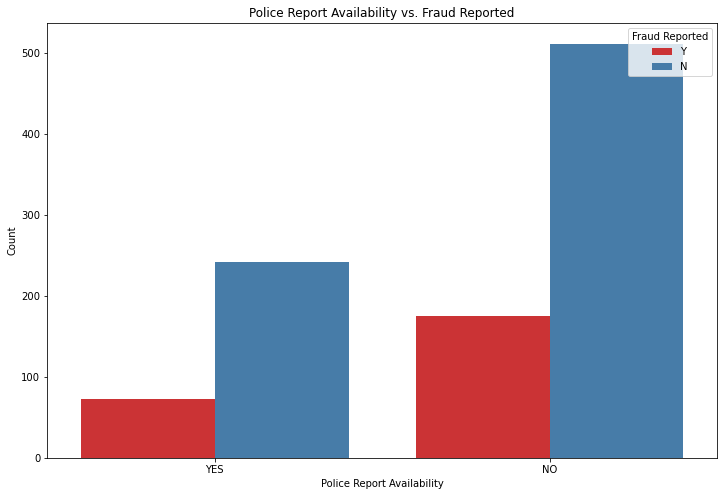

In [128]:
# Plot Stacked bar chart: Police Report Availability vs. Fraud Reported
plt.figure(figsize=(12, 8))
sns.countplot(x='police_report_available', hue='fraud_reported', data=df, palette='Set1')
plt.title('Police Report Availability vs. Fraud Reported')
plt.xlabel('Police Report Availability')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()


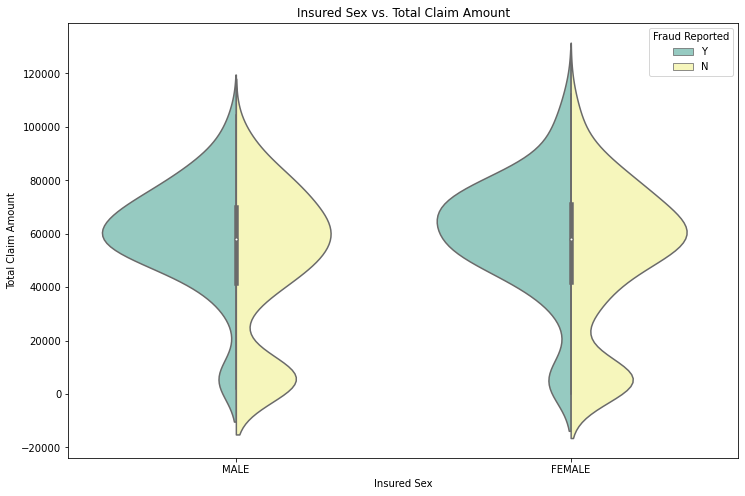

In [129]:
# Plot Violin plot: Insured Sex vs. Total Claim Amount with hue for Fraud Reported
plt.figure(figsize=(12, 8))
sns.violinplot(x='insured_sex', y='total_claim_amount', hue='fraud_reported', data=df, split=True, palette='Set3')
plt.title('Insured Sex vs. Total Claim Amount')
plt.xlabel('Insured Sex')
plt.ylabel('Total Claim Amount')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

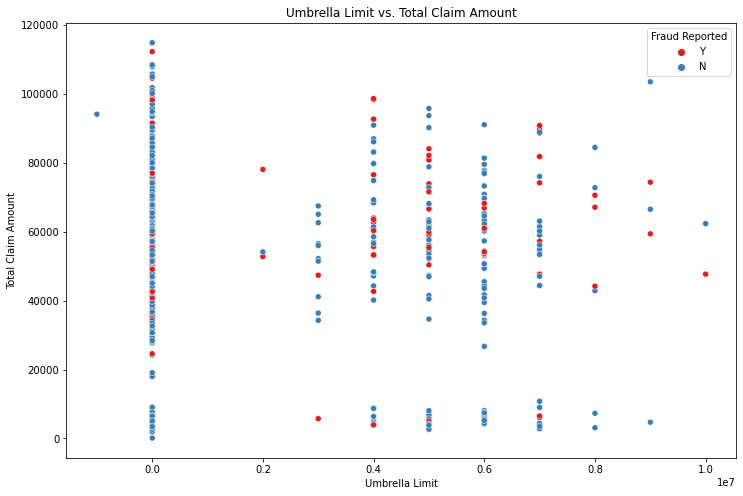

In [130]:
# Plot Scatter plot: Umbrella Limit vs. Total Claim Amount
plt.figure(figsize=(12, 8))
sns.scatterplot(x='umbrella_limit', y='total_claim_amount', data=df, hue='fraud_reported', palette='Set1')
plt.title('Umbrella Limit vs. Total Claim Amount')
plt.xlabel('Umbrella Limit')
plt.ylabel('Total Claim Amount')
plt.legend(title='Fraud Reported', loc='upper right')
plt.show()

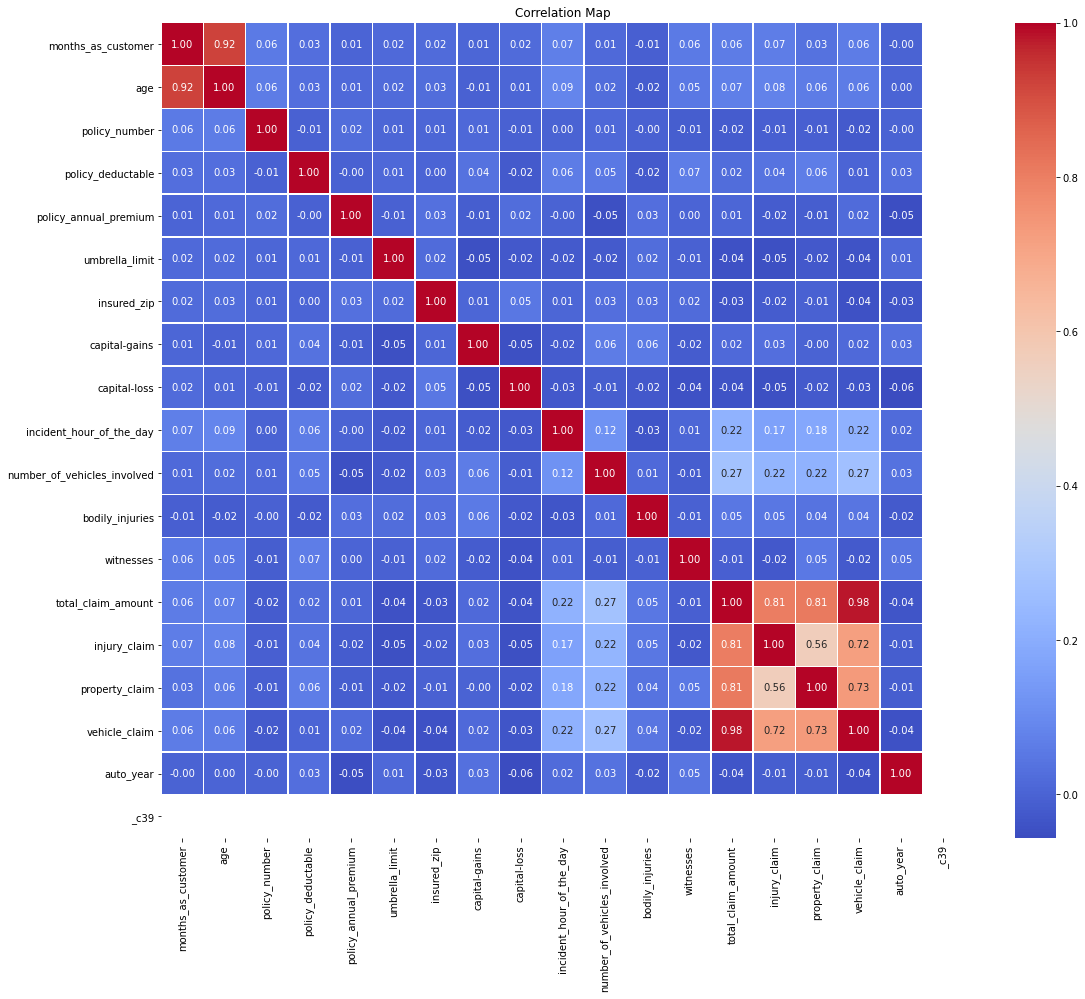

In [131]:
# Create a heatmap for the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.show()

* from the above correlation plot we can see multi collinearty issue

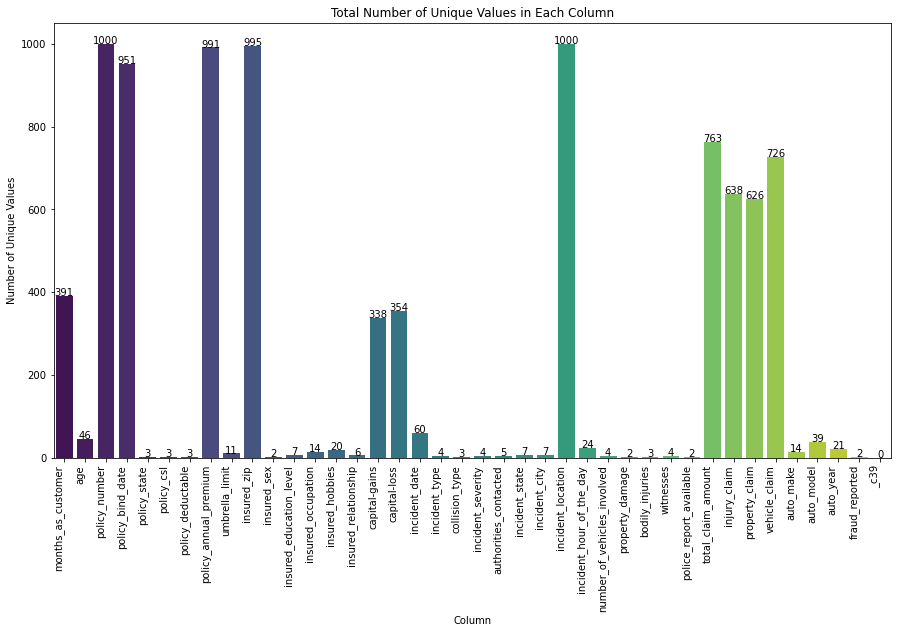

In [132]:

# Calculate total number of unique values in each column
unique_value_counts = df.nunique()

# Plot the bar plot with count values
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=unique_value_counts.index, y=unique_value_counts.values, palette='viridis')

# Add count values on top of each bar
for p, value in zip(ax.patches, unique_value_counts.values):
    ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', fontsize=10)

plt.title('Total Number of Unique Values in Each Column')
plt.xlabel('Column')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=90, ha='right')
plt.show()

If no.of unique values are more it can lead to high variance and noise to the dataset. 
We will drop columns that are not required.

In [133]:
# List of columns to drop
to_drop = ['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 'incident_location', 
           'incident_date', 'incident_state', 'incident_city', 'insured_hobbies', 
           'auto_make', 'auto_model', 'auto_year', '_c39']

# Drop the specified columns
df = df.drop(columns=to_drop)

# Display the updated DataFrame
df.head()


,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    # Create a DataFrame to store the VIF values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Select the independent variables for the check
independent_variables = df[['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
                             'umbrella_limit', 'capital-gains', 'capital-loss',
                             'incident_hour_of_the_day', 'number_of_vehicles_involved',
                             'bodily_injuries', 'witnesses', 'total_claim_amount',
                             'injury_claim', 'property_claim', 'vehicle_claim']]

# Calculate VIF for the selected variables
vif_results = calculate_vif(independent_variables)

# Display the VIF results
print(vif_results)


                       Variable        VIF
0            months_as_customer  18.374090
1                           age  65.889481
2             policy_deductable   4.421654
3         policy_annual_premium  19.994994
4                umbrella_limit   1.235073
5                 capital-gains   1.821686
6                  capital-loss   1.920120
7      incident_hour_of_the_day   4.040036
8   number_of_vehicles_involved   4.577519
9               bodily_injuries   2.455081
10                    witnesses   2.801968
11           total_claim_amount        inf
12                 injury_claim        inf
13               property_claim        inf
14                vehicle_claim        inf


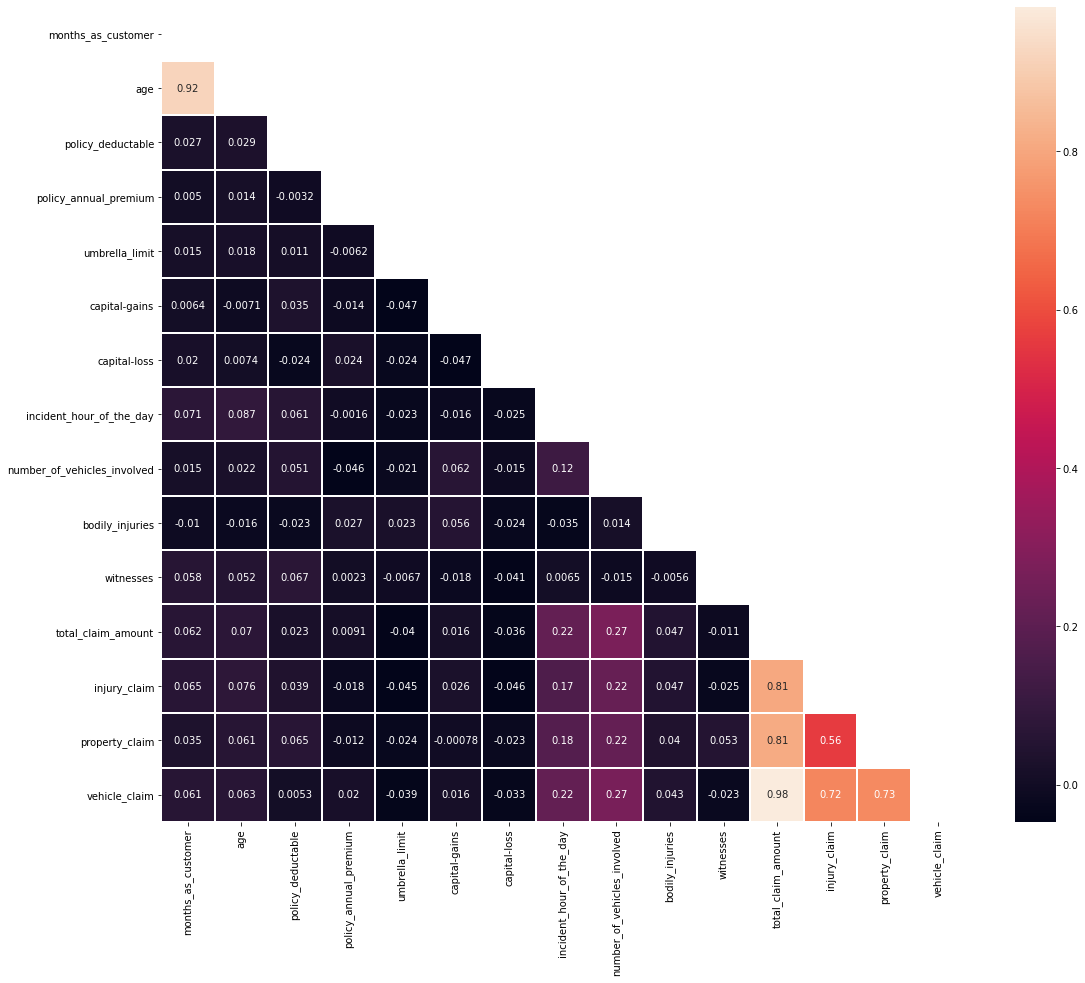

In [135]:
plt.figure(figsize=(18, 15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2g', linewidth=1)
plt.show()

In [136]:
# Drop 'age' and 'total_claim_amount' columns

df = df.drop(['age', 'total_claim_amount'], axis=1)

df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


## Label Encoding & Model Building

In [137]:
X= df.drop('fraud_reported',axis =1)
y = df['fraud_reported']

In [138]:
# categorical columns encoding
categorical_columns = X.select_dtypes(include=['object'])
# Perform one-hot encoding
Xcate= pd.get_dummies(categorical_columns, drop_first = True)

Xcate.head()


,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [139]:
numerical_columns = X.select_dtypes(include=['int64','float64'])
# Perform one-hot encoding
Xnum= pd.get_dummies(numerical_columns, drop_first = True)

Xnum.head()


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [140]:
Xnum

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,17440,8720,61040
996,285,1000,1436.79,0,70900,0,23,1,2,3,18080,18080,72320
997,130,500,1383.49,3000000,35100,0,4,3,2,3,7500,7500,52500
998,458,2000,1356.92,5000000,0,0,2,1,0,1,5220,5220,36540


In [141]:
X = pd.concat([Xnum,Xcate], axis = 1)

In [142]:
X.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,1,0,0,0,1,0,0,0,0


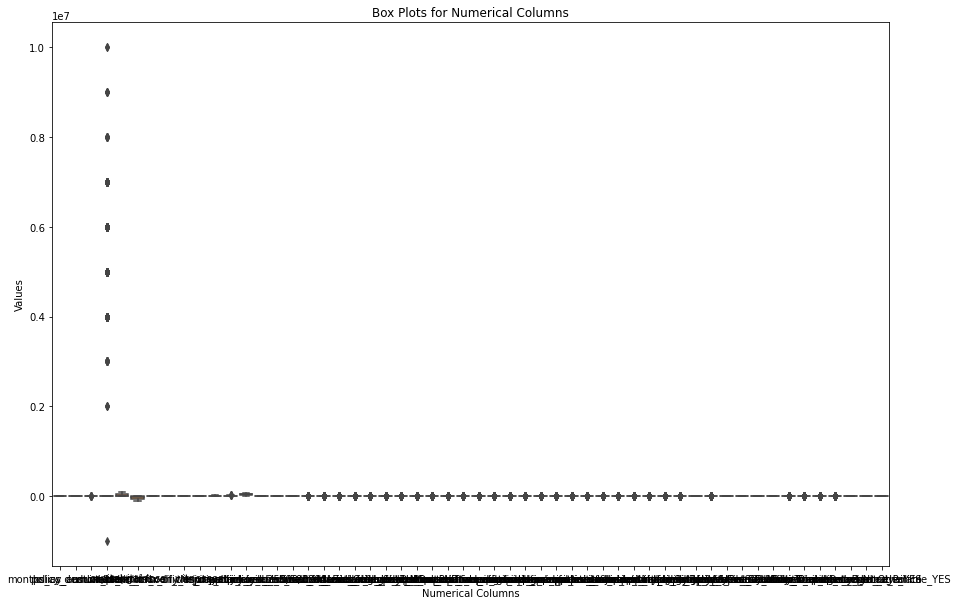

In [143]:
# Selecting only numerical columns
numerical_columns = X.select_dtypes(include=['number'])

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_columns)
plt.title('Box Plots for Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.show()

In [144]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = zscore(numerical_columns)

# Identify outliers based on Z-scores
outliers = (z_scores > 3) | (z_scores < -3)

# Display the rows with outliers
outlier_rows = numerical_columns[outliers.any(axis=1)]
print("Rows with Outliers:")
outlier_rows

Rows with Outliers:


,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,...,0,1,0,0,1,0,0,0,1,0
996,285,1000,1436.79,0,70900,0,23,1,2,3,...,0,0,0,0,1,0,0,0,1,0
997,130,500,1383.49,3000000,35100,0,4,3,2,3,...,1,1,0,0,0,0,0,1,0,1
998,458,2000,1356.92,5000000,0,0,2,1,0,1,...,0,0,0,0,0,0,1,0,0,1


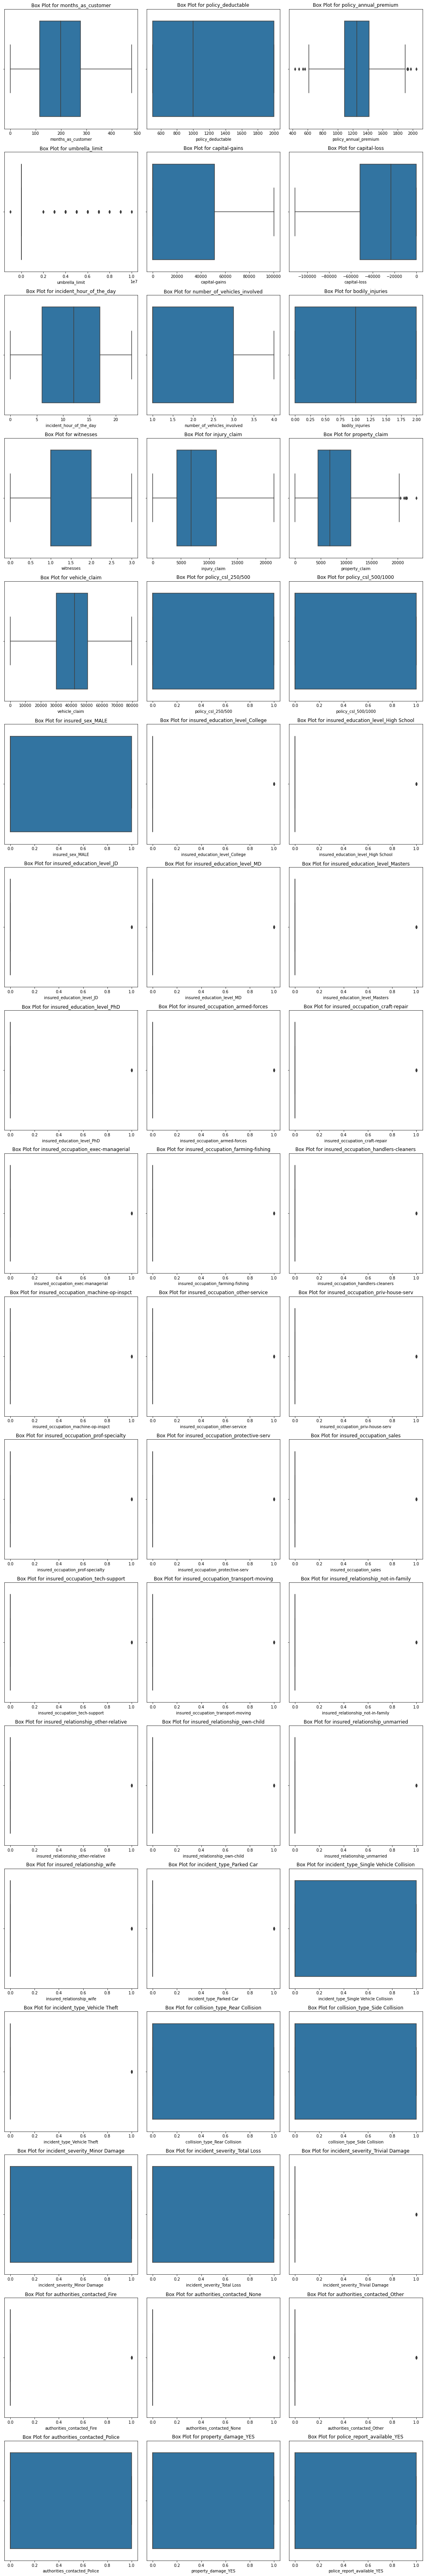

In [145]:
# Selecting only numerical columns
numerical_columns = X.select_dtypes(include=['number'])

# Determine the number of rows and columns for subplots
num_cols = len(numerical_columns.columns)
num_rows = (num_cols // 2) + (num_cols % 2)  # Round up if necessary

# Create individual box plots for each numerical column
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=numerical_columns[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


In [146]:
#Dealing with outliers by performing Standard Scaler 

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [148]:
X_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
541,239,1000,1325.44,7000000,51400,-6300,22,1,0,2,...,0,0,0,1,0,0,0,1,0,1
440,108,2000,1175.70,0,0,0,14,1,0,2,...,0,0,1,0,1,0,0,0,0,0
482,116,500,951.46,0,0,-35500,8,3,0,3,...,0,0,0,0,0,0,1,0,0,0
422,8,500,1021.90,0,0,0,21,1,0,0,...,0,0,0,0,0,0,1,0,0,0
778,161,2000,1133.85,0,60200,0,0,3,2,2,...,0,0,1,0,0,0,0,1,1,1


In [149]:
numerical_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                           'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                           'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
                           'injury_claim', 'property_claim', 'vehicle_claim']]

numerical_data

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
541,239,1000,7000000,51400,-6300,22,1,0,2,1660,830,8300
440,108,2000,0,0,0,14,1,0,2,6370,6370,44590
482,116,500,0,0,-35500,8,3,0,3,6630,6630,46410
422,8,500,0,0,0,21,1,0,0,14040,14040,63180
778,161,2000,0,60200,0,0,3,2,2,5040,15120,40320
...,...,...,...,...,...,...,...,...,...,...,...,...
106,464,1000,0,0,-56400,6,3,0,2,6650,19950,53200
270,369,2000,0,55400,0,6,3,2,0,17060,8530,59710
860,230,1000,0,0,-45300,13,3,1,2,10700,10700,37450
435,102,500,0,55200,0,6,1,1,0,7340,7340,58720


In [150]:
# Standardization
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on the training data
scaled_data = scaler.fit_transform(numerical_data)

# Convert the standardized data back to a DataFrame
scaled_num_df = pd.DataFrame(data=scaled_data, columns=numerical_data.columns, index=X_train.index)

# Display the standardized numerical data
print("Standardized Numerical Data:")
scaled_num_df.head()

Standardized Numerical Data:


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
541,0.257024,-0.230540,2.581616,0.907981,0.745342,1.468375,-0.815526,-1.223442,0.492253,-1.226042,-1.395255,-1.628037
440,-0.885443,1.391349,-0.477615,-0.913479,0.971519,0.322646,-0.815526,-1.223442,0.492253,-0.261765,-0.247396,0.314596
482,-0.815674,-1.041484,-0.477615,-0.913479,-0.302969,-0.536651,1.156385,-1.223442,1.375785,-0.208535,-0.193526,0.412022
422,-1.757555,-1.041484,-0.477615,-0.913479,0.971519,1.325159,-0.815526,-1.223442,-1.274810,1.308513,1.341787,1.309734
778,-0.423223,1.391349,-0.477615,1.219826,0.971519,-1.682381,1.156385,1.219951,0.492253,-0.534055,1.565557,0.086019


In [151]:
# Drop columns from X_train based on scaled_num_df columns
X_train.drop(columns=scaled_num_df.columns, inplace=True)

X_train = pd.concat([scaled_num_df,X_train], axis =1)


In [152]:

X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
541,0.257024,-0.230540,2.581616,0.907981,0.745342,1.468375,-0.815526,-1.223442,0.492253,-1.226042,...,0,0,0,1,0,0,0,1,0,1
440,-0.885443,1.391349,-0.477615,-0.913479,0.971519,0.322646,-0.815526,-1.223442,0.492253,-0.261765,...,0,0,1,0,1,0,0,0,0,0
482,-0.815674,-1.041484,-0.477615,-0.913479,-0.302969,-0.536651,1.156385,-1.223442,1.375785,-0.208535,...,0,0,0,0,0,0,1,0,0,0
422,-1.757555,-1.041484,-0.477615,-0.913479,0.971519,1.325159,-0.815526,-1.223442,-1.274810,1.308513,...,0,0,0,0,0,0,1,0,0,0
778,-0.423223,1.391349,-0.477615,1.219826,0.971519,-1.682381,1.156385,1.219951,0.492253,-0.534055,...,0,0,1,0,0,0,0,1,1,1


## Modeling

In [154]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [155]:
# Define the classifiers
classifiers = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(),
               GradientBoostingClassifier(), AdaBoostClassifier()]

# Set a range of random states to try
random_states = range(1, 101)

# Dictionary to store mean cross-validation scores for each classifier
cv_scores = {}

# Iterate over classifiers
for classifier in classifiers:
    # Initialize an empty list to store cross-validation scores for each random state
    scores_for_classifier = []
    
    # Iterate over random states
    for random_state in random_states:
        # Split the data into training and validation sets
        X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)
        
        # Initialize the classifier with default parameters
        clf = classifier
        
        # Fit the classifier on the training set and compute cross-validation score
        score = cross_val_score(clf, X_train_split, y_train_split, cv=5, scoring='accuracy').mean()
        
        # Append the cross-validation score to the list
        scores_for_classifier.append(score)
    
    # Store the mean cross-validation scores for the classifier in the dictionary
    cv_scores[classifier.__class__.__name__] = scores_for_classifier

# Find the random state with the maximum mean cross-validation score for each classifier
best_random_states = {clf: random_states[scores.index(max(scores))] for clf, scores in cv_scores.items()}

# Display the best random states for each classifier
for clf, random_state in best_random_states.items():
    print(f"{clf}: Best Random State = {random_state}")


RandomForestClassifier: Best Random State = 87
LogisticRegression: Best Random State = 65
DecisionTreeClassifier: Best Random State = 67
GradientBoostingClassifier: Best Random State = 87
AdaBoostClassifier: Best Random State = 77


In [161]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=87),
    'Random Forest': RandomForestClassifier(random_state=65),
    'Decision Tree': DecisionTreeClassifier(random_state=67),
    'Gradient Boosting': GradientBoostingClassifier(random_state=87),
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train_split, y_train_split)
    y_train_pred = classifier.predict(X_train_split)
    y_test_pred = classifier.predict(X_val)
    
    # Calculate training and testing accuracy
    accuracy_train = accuracy_score(y_train_split, y_train_pred)
    accuracy_test = accuracy_score(y_val, y_test_pred)
    
    report = classification_report(y_val, y_test_pred)  # Use class labels directly
    
    print(f"Classifier: {name}")
    print(f"Training Accuracy: {accuracy_train:.2f}")
    print(f"Testing Accuracy: {accuracy_test:.2f}")
    print(report)
    print("-" * 50)

Classifier: Logistic Regression
Training Accuracy: 0.85
Testing Accuracy: 0.79
              precision    recall  f1-score   support

           N       0.80      0.94      0.86       102
           Y       0.70      0.37      0.48        38

    accuracy                           0.79       140
   macro avg       0.75      0.65      0.67       140
weighted avg       0.77      0.79      0.76       140

--------------------------------------------------
Classifier: Random Forest
Training Accuracy: 1.00
Testing Accuracy: 0.74
              precision    recall  f1-score   support

           N       0.74      0.98      0.84       102
           Y       0.60      0.08      0.14        38

    accuracy                           0.74       140
   macro avg       0.67      0.53      0.49       140
weighted avg       0.70      0.74      0.65       140

--------------------------------------------------
Classifier: Decision Tree
Training Accuracy: 1.00
Testing Accuracy: 0.73
              preci

Considering the training and testing accuracies, as well as precision, recall, and F1-score, the -->" Logistic Regression "<-- model seems to be the best suitable model for this specific scenario. 
It has a relatively good testing accuracy while maintaining a reasonable balance in precision, recall, and F1-score.
##  Logistic Regression 
> Training Accuracy: 0.85
Testing Accuracy: 0.79

## Hyper parameter training

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}



In [169]:
# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=65)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(logreg_model, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_split, y_train_split)


Fitting 3 folds for each of 450 candidates, totalling 1350 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=65), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=1)

In [170]:
# Print the best hyperparameters
print("Best Hyperparameters for Logistic Regression:")
print(grid_search.best_params_)


Best Hyperparameters for Logistic Regression:
{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [171]:
# Get the best model
best_logreg_model = grid_search.best_estimator_


In [168]:
# Display the classification report
from sklearn.metrics import classification_report
print("Classification Report for Logistic Regression:")
print(classification_report(y_val, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           N       0.81      0.93      0.86       102
           Y       0.68      0.39      0.50        38

    accuracy                           0.79       140
   macro avg       0.74      0.66      0.68       140
weighted avg       0.77      0.79      0.76       140



In [172]:
# Evaluate the model on the test set
y_pred = best_logreg_model.predict(X_val)
accuracy = accuracy_score(y_val, y_test_pred)
print(f"Testing Accuracy with Best Model: {accuracy*100:.2f}")

Testing Accuracy with Best Model: 77.86


## Testing Accuracy with Best Model: 77.86

In [174]:
import pickle

# Save the trained model to a file
model_filename = 'Insurance_log_clas_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_logreg_model, file)

print(f"Model saved to {model_filename}")

Model saved to Insurance_log_clas_model.pkl
